In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount= True)

Mounted at /content/drive/


In [2]:
import pandas as pd
import random
import os
import numpy as np

In [3]:
train_path = "/content/drive/MyDrive/card_train.csv"
test_path = "/content/drive/MyDrive/card_test.csv"

In [4]:
train_df = pd.read_csv(train_path, encoding = 'utf-8-sig')
y_train = train_df['Segment']
train_df

,Unnamed: 0.1,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,청구금액_B0,...,컨택건수_CA_청구서_R6M,컨택건수_이용유도_청구서_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_채권_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,ID,Segment.1
0,61865,1,자동이체,주거지,우편,우편,1,1,1,466,...,0,5,5,0,0,0,1회 이상,1일 이상,TRAIN_000389,E
1,8547,13,자동이체,미확인,이메일,이메일,1,1,1,2417,...,0,4,6,0,0,0,1회 이상,1일 이상,TRAIN_304152,D
2,43497,25,자동이체,주거지,우편,우편,0,0,0,0,...,2,4,2,0,0,0,5회 이상,5일 이상,TRAIN_356239,E
3,40785,25,자동이체,주거지,우편,우편,1,1,1,5931,...,0,0,0,0,0,0,1회 이상,1일 이상,TRAIN_122432,E
4,18999,25,자동이체,주거지,우편,우편,1,1,1,684,...,2,0,0,0,0,0,10회 이상,10일 이상,TRAIN_285200,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70555,40610,20,자동이체,회사,우편,우편,1,1,1,958,...,0,0,4,0,0,0,5회 이상,5일 이상,TRAIN_194015,E
70556,2629,27,자동이체,주거지,우편,우편,1,1,1,19187,...,0,1,0,0,0,3,1회 이상,1일 이상,TRAIN_286464,C
70557,65345,12,자동이체,주거지,우편,우편,1,1,1,4788,...,2,0,0,0,0,0,20회 이상,20일 이상,TRAIN_069189,E
70558,69023,23,자동이체,미확인,이메일,이메일,1,1,1,17,...,0,2,0,0,0,0,10회 이상,10일 이상,TRAIN_170116,E


## feature 선정

In [5]:
for i in train_df.columns:
    print(i)

Unnamed: 0.1
대표결제일
대표결제방법코드
대표청구지고객주소구분코드
대표청구서수령지구분코드
청구서수령방법
청구서발송여부_B0
청구서발송여부_R3M
청구서발송여부_R6M
청구금액_B0
청구금액_R3M
청구금액_R6M
포인트_마일리지_건별_B0M
포인트_마일리지_건별_R3M
포인트_포인트_건별_B0M
포인트_포인트_건별_R3M
포인트_마일리지_월적립_B0M
포인트_마일리지_월적립_R3M
포인트_포인트_월적립_B0M
포인트_포인트_월적립_R3M
포인트_적립포인트_R12M
포인트_적립포인트_R3M
포인트_이용포인트_R12M
포인트_이용포인트_R3M
포인트_잔여포인트_B0M
마일_적립포인트_R12M
마일_적립포인트_R3M
마일_이용포인트_R12M
마일_이용포인트_R3M
마일_잔여포인트_B0M
할인건수_R3M
할인금액_R3M
할인건수_B0M
할인금액_B0M
할인금액_청구서_R3M
할인금액_청구서_B0M
상환개월수_결제일_R6M
상환개월수_결제일_R3M
선결제건수_R6M
선결제건수_R3M
연체건수_R6M
연체건수_R3M
혜택수혜금액_R3M
포인트_마일리지_환산_B0M
혜택수혜금액
최초한도금액
카드이용한도금액
CA한도금액
일시상환론한도금액
월상환론한도금액
CA이자율_할인전
CL이자율_할인전
RV일시불이자율_할인전
RV현금서비스이자율_할인전
RV신청일자
RV약정청구율
RV최소결제비율
자발한도감액횟수_R12M
자발한도감액금액_R12M
자발한도감액후경과월
강제한도감액횟수_R12M
강제한도감액금액_R12M
강제한도감액후경과월
한도증액횟수_R12M
한도증액금액_R12M
한도증액후경과월
상향가능한도금액
상향가능CA한도금액
카드론동의여부
월상환론상향가능한도금액
RV전환가능여부
일시불ONLY전환가능여부
카드이용한도금액_B1M
카드이용한도금액_B2M
특별한도보유여부_R3M
연체감액여부_R3M
한도심사요청건수
한도요청거절건수
한도심사요청후경과월
한도심사거절후경과월
시장단기연체여부_R6M
rv최초시작후경과일
증감율_이용건수_신용_전월
증감율_이용건수_신판_전월
증감율_이용건수_일시불_전

In [6]:
recommended_columns = [

    "남녀구분코드", "연령", "Life_Stage","회원여부_연체",
    "이용금액_할부_R12M","입회경과개월수_신용","월상환론한도금액","카드이용한도금액","증감율_이용금액_체크_전월","이용금액_일시불_R12M",
    "포인트_이용포인트_R12M","이용건수_체크_R12M","이용건수_신용_R12M","유효카드수_신용체크","이용금액_체크_R12M",
    "불만제기후경과월_R12M","RP후경과월","_1순위카드이용금액","포인트_적립포인트_R12M",
    "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종","_1순위카드이용건수","월중평잔",
     "_2순위업종_이용금액", "_2순위업종","_2순위카드이용금액","_2순위교통업종","_2순위쇼핑업종",
    "증감율_이용건수_신용_분기","CA한도금액","변동률_일시불평잔","강제한도감액금액_R12M","일시상환론한도금액",
    "변동률_할부평잔","상향가능한도금액","카드론이용건수_누적","이용건수_할부_R12M","정상청구원금_B5M","이용개월수_체크_R12M",
    "연체입금원금_B5M","정상입금원금_B5M","이용개월수_할부_R12M","최초카드론이용경과월",
    "연체일수_최근",
    "최종이용일자_기본",
    "컨택건수_이용유도_TM_R6M",
    "증감율_이용건수_체크_전월",
    "마케팅동의여부",
    "연체원금_최근",
    "이용금액_체크_B0M",
    "최종카드발급경과월",
    "수신거부여부_SMS",
    "RP건수_렌탈_B0M",
]

In [7]:
X = train_df[recommended_columns]
X

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,연체일수_최근,최종이용일자_기본,컨택건수_이용유도_TM_R6M,증감율_이용건수_체크_전월,마케팅동의여부,연체원금_최근,이용금액_체크_B0M,최종카드발급경과월,수신거부여부_SMS,RP건수_렌탈_B0M
0,2,60대,노년생활,0,0,39,180503,100009,0.000000,8166,...,-999999,20180714,1,0.000000,0,0,0,6,1,0
1,1,30대,가족구축기,0,0,39,0,41180,0.000000,41278,...,-999999,20181130,0,0.000000,1,0,0,49,1,0
2,2,50대,자녀성장(2),0,0,172,206098,40798,0.000000,2979,...,-999999,20180110,5,0.000000,1,0,0,26,1,0
3,2,60대,노년생활,0,24373,202,206308,29999,0.000000,37780,...,-999999,20180911,1,0.000000,1,0,0,22,0,0
4,2,30대,자녀성장(1),0,15966,3,93789,18989,0.002695,2248,...,-999999,20180921,2,-0.210627,1,0,3180,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70555,1,40대,자녀성장(1),0,3982,11,151553,30003,0.000000,22659,...,-999999,20171127,0,0.000000,1,0,0,17,0,0
70556,1,50대,자녀성장(2),0,0,278,0,52017,0.000000,25655,...,-999999,20180723,0,0.000000,0,0,0,52,1,0
70557,2,60대,자녀독립기,0,28782,191,205060,41444,0.000000,27394,...,-999999,20180721,0,0.000000,1,0,0,13,0,0
70558,2,50대,자녀독립기,0,0,105,160705,50371,0.000000,952,...,-999999,20180709,0,0.000000,1,0,0,13,0,0


In [8]:
null_columns = [col for col in X.columns if X[col].isna().sum() > 0]
len(null_columns), null_columns

(6, ['_1순위업종', '_1순위쇼핑업종', '_1순위교통업종', '_2순위업종', '_2순위교통업종', '_2순위쇼핑업종'])

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70560 entries, 0 to 70559
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   남녀구분코드            70560 non-null  int64  
 1   연령                70560 non-null  object 
 2   Life_Stage        70560 non-null  object 
 3   회원여부_연체           70560 non-null  int64  
 4   이용금액_할부_R12M      70560 non-null  int64  
 5   입회경과개월수_신용        70560 non-null  int64  
 6   월상환론한도금액          70560 non-null  int64  
 7   카드이용한도금액          70560 non-null  int64  
 8   증감율_이용금액_체크_전월    70560 non-null  float64
 9   이용금액_일시불_R12M     70560 non-null  int64  
 10  포인트_이용포인트_R12M    70560 non-null  int64  
 11  이용건수_체크_R12M      70560 non-null  int64  
 12  이용건수_신용_R12M      70560 non-null  int64  
 13  유효카드수_신용체크        70560 non-null  int64  
 14  이용금액_체크_R12M      70560 non-null  int64  
 15  불만제기후경과월_R12M     70560 non-null  int64  
 16  RP후경과월            70560 non-null  int64 

In [10]:
oj_columns = [x for x in X.columns if X[x].dtype == "object"]
oj_columns


['연령',
 'Life_Stage',
 '_1순위업종',
 '_1순위쇼핑업종',
 '_1순위교통업종',
 '_2순위업종',
 '_2순위교통업종',
 '_2순위쇼핑업종']

In [11]:
for oj in oj_columns:
  print(oj, X[oj].unique())

연령 ['60대' '30대' '50대' '40대' '20대' '70대이상']
Life_Stage ['노년생활' '가족구축기' '자녀성장(2)' '자녀성장(1)' '독신' '자녀출산기' '자녀독립기']
_1순위업종 ['쇼핑' '교통' nan '납부' '교육' '사교활동' '의료' '해외' '여유생활' '일상생활']
_1순위쇼핑업종 ['마트' '온라인' nan '도소매' '슈퍼마켓' '쇼핑기타' '백화점' '편의점' '아울렛']
_1순위교통업종 [nan '주유' '버스지하철' '철도버스' '정비' '택시']
_2순위업종 [nan '쇼핑' '납부' '사교활동' '의료' '교통' '해외' '교육' '일상생활' '여유생활' '요식']
_2순위교통업종 [nan '버스지하철' '철도버스' '정비' '택시' '주유']
_2순위쇼핑업종 ['도소매' '슈퍼마켓' nan '편의점' '마트' '백화점' '온라인' '쇼핑기타' '아울렛']


## 전처리

In [12]:
# object 타입의 문자열 범주형 변수를 int로 변환
from sklearn.preprocessing import LabelEncoder

def preprocessing(df):
    oj_columns = [x for x in df.columns if df[x].dtype == "object"]
    for cate in oj_columns:
        le = LabelEncoder()
        try:
            df[cate] = le.fit_transform(df[cate].astype(str))
        except:
            pass  # 혹시라도 이상한 문자열형식이면 skip
    return df


In [13]:
x_train = preprocessing(X)
x_train

<ipython-input-12-c3e4bce5cfc7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cate] = le.fit_transform(df[cate].astype(str))
<ipython-input-12-c3e4bce5cfc7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cate] = le.fit_transform(df[cate].astype(str))
<ipython-input-12-c3e4bce5cfc7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,연체일수_최근,최종이용일자_기본,컨택건수_이용유도_TM_R6M,증감율_이용건수_체크_전월,마케팅동의여부,연체원금_최근,이용금액_체크_B0M,최종카드발급경과월,수신거부여부_SMS,RP건수_렌탈_B0M
0,2,4,1,0,0,39,180503,100009,0.000000,8166,...,-999999,20180714,1,0.000000,0,0,0,6,1,0
1,1,1,0,0,0,39,0,41180,0.000000,41278,...,-999999,20181130,0,0.000000,1,0,0,49,1,0
2,2,3,5,0,0,172,206098,40798,0.000000,2979,...,-999999,20180110,5,0.000000,1,0,0,26,1,0
3,2,4,1,0,24373,202,206308,29999,0.000000,37780,...,-999999,20180911,1,0.000000,1,0,0,22,0,0
4,2,1,4,0,15966,3,93789,18989,0.002695,2248,...,-999999,20180921,2,-0.210627,1,0,3180,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70555,1,2,4,0,3982,11,151553,30003,0.000000,22659,...,-999999,20171127,0,0.000000,1,0,0,17,0,0
70556,1,3,5,0,0,278,0,52017,0.000000,25655,...,-999999,20180723,0,0.000000,0,0,0,52,1,0
70557,2,4,3,0,28782,191,205060,41444,0.000000,27394,...,-999999,20180721,0,0.000000,1,0,0,13,0,0
70558,2,3,3,0,0,105,160705,50371,0.000000,952,...,-999999,20180709,0,0.000000,1,0,0,13,0,0


In [14]:
def apply_frequency_encoding(df):
    #연령만 프리퀀시 인코더 적용
    #컬럼 하나만 바꾸기 때문에 encoder을 쓸 필요는 없음
    freq_map = df["연령"].value_counts().to_dict()
    df["연령"] = df["연령"].map(freq_map)

    #['연령']을 프리퀀시 인코딩 하니 미세하게 모델 성능이 향상됨. 따라서 dtpye이 object인 컬럼들을 브리퀀시 인코딩 해봄.
    #모델이 “업종”의 의미보단 “몇 명이 이 업종을 쓰는지”에 집중
    #희귀 업종의 영향력을 자동으로 줄여줌
    freq_cols = [
        "Life_Stage",
        "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종",
        "_2순위업종", "_2순위교통업종", "_2순위쇼핑업종"
    ]

    # 각 컬럼에 대해 Frequency Encoding 적용
    for col in freq_cols:
        freq_map = df[col].value_counts().to_dict()
        df[col] = df[col].map(freq_map)

    return df


In [15]:
X = apply_frequency_encoding(X)

<ipython-input-14-d40c86834d74>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["연령"] = df["연령"].map(freq_map)
<ipython-input-14-d40c86834d74>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(freq_map)


In [16]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70560 entries, 0 to 70559
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   남녀구분코드            70560 non-null  int64  
 1   연령                70560 non-null  int64  
 2   Life_Stage        70560 non-null  int64  
 3   회원여부_연체           70560 non-null  int64  
 4   이용금액_할부_R12M      70560 non-null  int64  
 5   입회경과개월수_신용        70560 non-null  int64  
 6   월상환론한도금액          70560 non-null  int64  
 7   카드이용한도금액          70560 non-null  int64  
 8   증감율_이용금액_체크_전월    70560 non-null  float64
 9   이용금액_일시불_R12M     70560 non-null  int64  
 10  포인트_이용포인트_R12M    70560 non-null  int64  
 11  이용건수_체크_R12M      70560 non-null  int64  
 12  이용건수_신용_R12M      70560 non-null  int64  
 13  유효카드수_신용체크        70560 non-null  int64  
 14  이용금액_체크_R12M      70560 non-null  int64  
 15  불만제기후경과월_R12M     70560 non-null  int64  
 16  RP후경과월            70560 non-null  int64 

#### 파생변수 생성

In [17]:
def add_custom_features(df):
    df = df.copy()  # SettingWithCopyWarning 방지
    df["신용카드_이용률"] = df["이용금액_일시불_R12M"] / (df["카드이용한도금액"] + 1)
    df["체크카드_이용률"] = df["이용금액_체크_R12M"] / (df["월중평잔"] + 1)
    df["포인트_사용률"] = df["포인트_이용포인트_R12M"] / (df["포인트_적립포인트_R12M"] + 1)
    df["평균_건당_결제금액"] = df["이용금액_일시불_R12M"] / (df["이용건수_신용_R12M"] + 1)
    df["연체비율"] = df["연체원금_최근"] / (df["정상입금원금_B5M"] + 1)
    df["상향가능_비율"] = df["상향가능한도금액"] / (df["카드이용한도금액"] + 1)
    df["카드론_활용도"] = df["카드론이용건수_누적"] / (df["이용개월수_할부_R12M"] + 1)
    df["불만_경과율"] = df["불만제기후경과월_R12M"] / 12
    return df


In [18]:
X = add_custom_features(X)

In [19]:
x_test = pd.read_csv(test_path, encoding='utf-8-sig')
x_test = x_test[recommended_columns]
x_test = preprocessing(x_test)
x_test = apply_frequency_encoding(x_test)


freq_map = x_test["연령"].value_counts().to_dict()
x_test["연령"] = x_test["연령"].map(freq_map)

freq_cols = [
    "Life_Stage",
    "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종",
    "_2순위업종", "_2순위교통업종", "_2순위쇼핑업종"
]

for col in freq_cols:
    freq_map = x_test[col].value_counts().to_dict()
    x_test[col] = x_test[col].map(freq_map)

x_test["신용카드_이용률"] = x_test["이용금액_일시불_R12M"] / (x_test["카드이용한도금액"] + 1)
x_test["체크카드_이용률"] = x_test["이용금액_체크_R12M"] / (x_test["월중평잔"] + 1)
x_test["포인트_사용률"] = x_test["포인트_이용포인트_R12M"] / (x_test["포인트_적립포인트_R12M"] + 1)
x_test["평균_건당_결제금액"] = x_test["이용금액_일시불_R12M"] / (x_test["이용건수_신용_R12M"] + 1)
x_test["연체비율"] = x_test["연체원금_최근"] / (x_test["정상입금원금_B5M"] + 1)
x_test["상향가능_비율"] = x_test["상향가능한도금액"] / (x_test["카드이용한도금액"] + 1)
x_test["카드론_활용도"] = x_test["카드론이용건수_누적"] / (x_test["이용개월수_할부_R12M"] + 1)
x_test["불만_경과율"] = x_test["불만제기후경과월_R12M"] / 12


In [20]:
!apt-get -qq install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설정
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = fontprop.get_name()
plt.rcParams["axes.unicode_minus"] = False

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

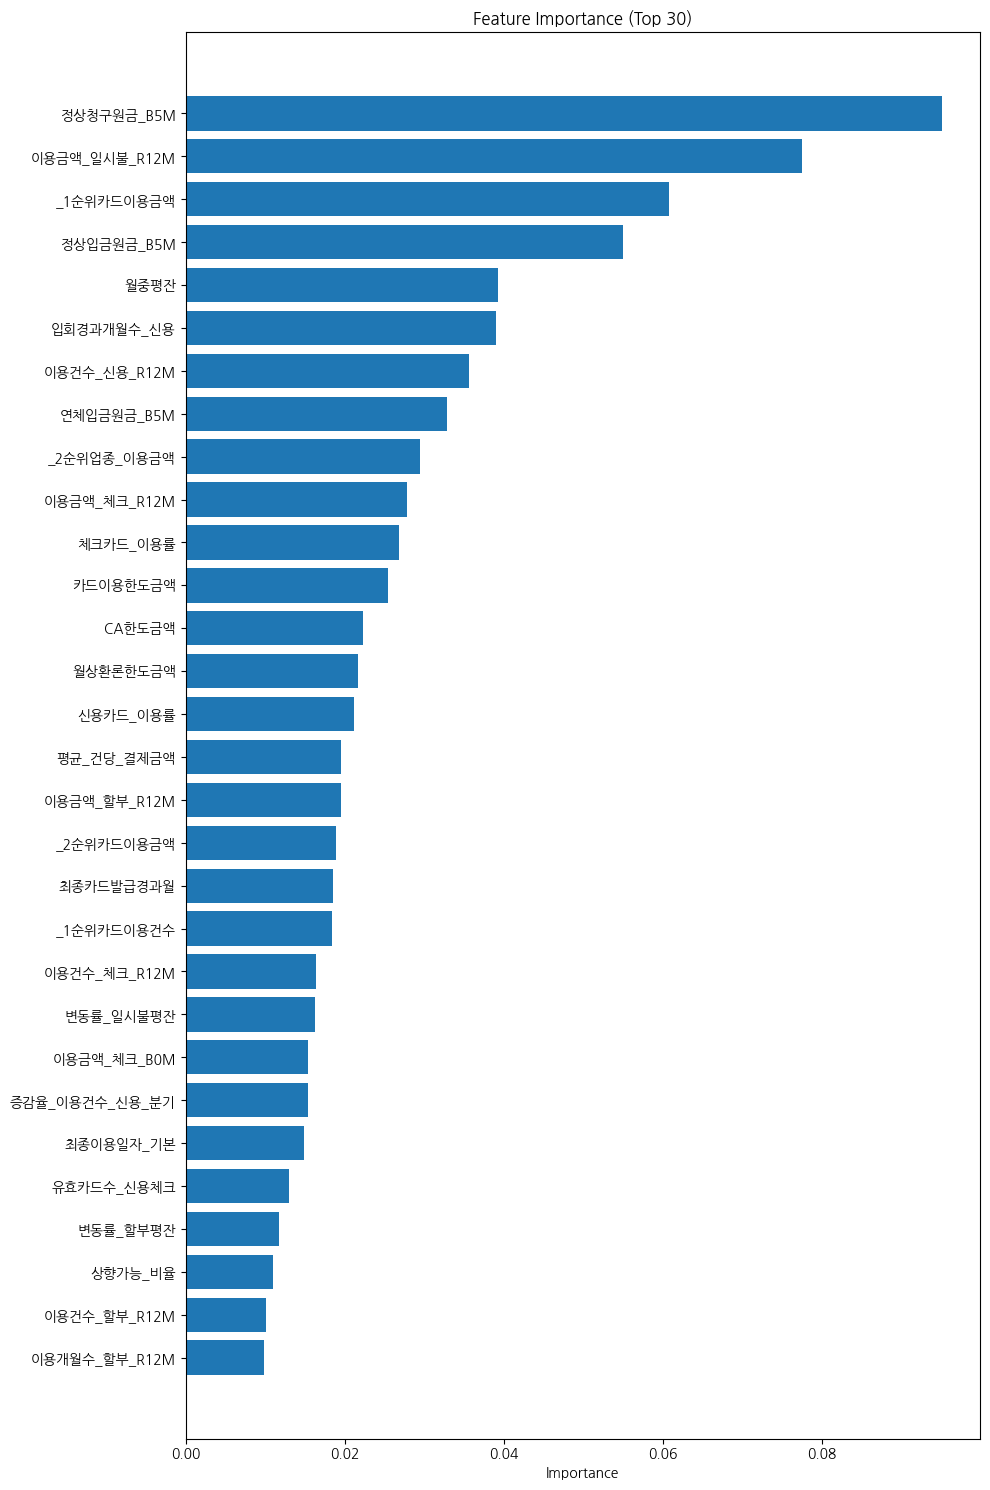

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import matplotlib as mpl
import matplotlib.font_manager as fm
import numpy as np

# 1. 수치형 피처만 선택
X_numeric = X.select_dtypes(include=["int64", "float64"])
y = train_df["Segment"]

# 추가: inf, -inf 값 NaN으로 변환 (이게 누락돼서 오류 발생했던 것)
X_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)

# 2. 결측치 평균 대체
imputer = SimpleImputer(strategy="mean")
X_numeric_clean = pd.DataFrame(imputer.fit_transform(X_numeric), columns=X_numeric.columns)

# 3. 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_numeric_clean, y)

# 4. 중요도 추출
importance = pd.Series(model.feature_importances_, index=X_numeric.columns)
top30 = importance.sort_values(ascending=True).tail(30)

# 5. 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)

mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

# 6. 시각화
plt.figure(figsize=(10, 15))
plt.barh(top30.index, top30.values)
plt.title("Feature Importance (Top 30)")
plt.xlabel("Importance")
plt.yticks(fontproperties=font_prop)
plt.tight_layout()
plt.show()


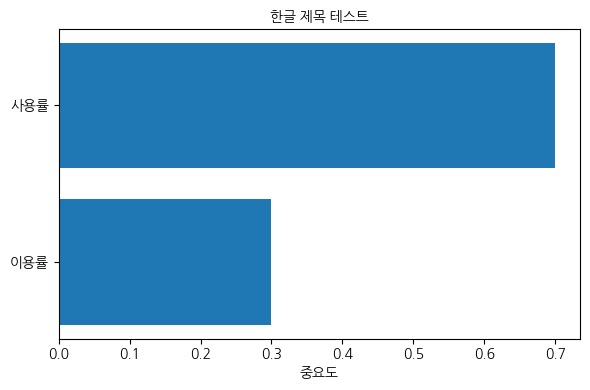

In [22]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 나눔고딕 경로 확인
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)

# 전역 설정
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(6, 4))
plt.title("한글 제목 테스트", fontproperties=font_prop)
plt.barh(["이용률", "사용률"], [0.3, 0.7])
plt.xlabel("중요도", fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.tight_layout()
plt.show()

In [23]:
# inf가 있는 컬럼 확인
mask_inf = X_numeric.replace([np.inf, -np.inf], np.nan)
inf_cols = mask_inf.columns[mask_inf.isna().any()]
print("inf가 있는 컬럼:", list(inf_cols))

inf가 있는 컬럼: ['평균_건당_결제금액']


In [24]:
y_train

,Segment
0,E
1,D
2,E
3,E
4,E
...,...
70555,E
70556,C
70557,E
70558,E


## 모델 학습 및 앙상블 예측

In [25]:
!pip install xgboost lightgbm catboost

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [26]:
X = x_train
y = y_train

In [27]:
y

,Segment
0,E
1,D
2,E
3,E
4,E
...,...
70555,E
70556,C
70557,E
70558,E


In [28]:
print(y.value_counts())

Segment
E    56505
D    10270
C     3753
A       28
B        4
Name: count, dtype: int64


In [29]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)

In [30]:
#불균형 확인

y = pd.Series(y)

print(y.value_counts())
print(y.value_counts(normalize=True))

4    56505
3    10270
2     3753
0       28
1        4
Name: count, dtype: int64
4    0.800808
3    0.145550
2    0.053189
0    0.000397
1    0.000057
Name: proportion, dtype: float64


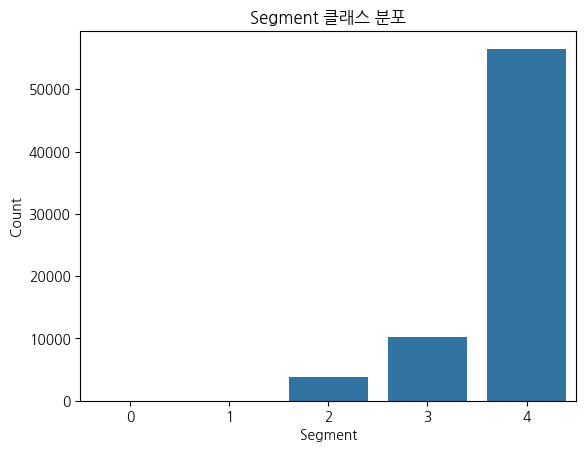

In [31]:
sns.countplot(x=y)
plt.title("Segment 클래스 분포")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

In [32]:
print(y.value_counts())

4    56505
3    10270
2     3753
0       28
1        4
Name: count, dtype: int64


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70560 entries, 0 to 70559
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   남녀구분코드            70560 non-null  int64  
 1   연령                70560 non-null  int64  
 2   Life_Stage        70560 non-null  int64  
 3   회원여부_연체           70560 non-null  int64  
 4   이용금액_할부_R12M      70560 non-null  int64  
 5   입회경과개월수_신용        70560 non-null  int64  
 6   월상환론한도금액          70560 non-null  int64  
 7   카드이용한도금액          70560 non-null  int64  
 8   증감율_이용금액_체크_전월    70560 non-null  float64
 9   이용금액_일시불_R12M     70560 non-null  int64  
 10  포인트_이용포인트_R12M    70560 non-null  int64  
 11  이용건수_체크_R12M      70560 non-null  int64  
 12  이용건수_신용_R12M      70560 non-null  int64  
 13  유효카드수_신용체크        70560 non-null  int64  
 14  이용금액_체크_R12M      70560 non-null  int64  
 15  불만제기후경과월_R12M     70560 non-null  int64  
 16  RP후경과월            70560 non-null  int64 

## SMOTE + RandomOverSampler 조합

In [34]:
import numpy as np

# 무한값 → NaN → 0 또는 평균으로 대체
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(0)  # 또는 .fillna(X.mean())

In [35]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
import pandas as pd

# 1. SMOTE로 클래스 2, 3 보완
smote = SMOTE(
    sampling_strategy={2: 40000, 3: 45000},  # 원하는 수치로 증강
    random_state=42
)
X_sm, y_sm = smote.fit_resample(X, y)

# 2. RandomOverSampler로 클래스 0, 1 복제
ros = RandomOverSampler(
    sampling_strategy={0: 35000, 1: 30000},  # 최소 1,000개로 맞춤
    random_state=42
)
X_resampled, y_resampled = ros.fit_resample(X_sm, y_sm)

# 확인
print("클래스 분포:")
print(pd.Series(y_resampled).value_counts())


클래스 분포:
4    56505
3    45000
2    40000
0    35000
1    30000
Name: count, dtype: int64


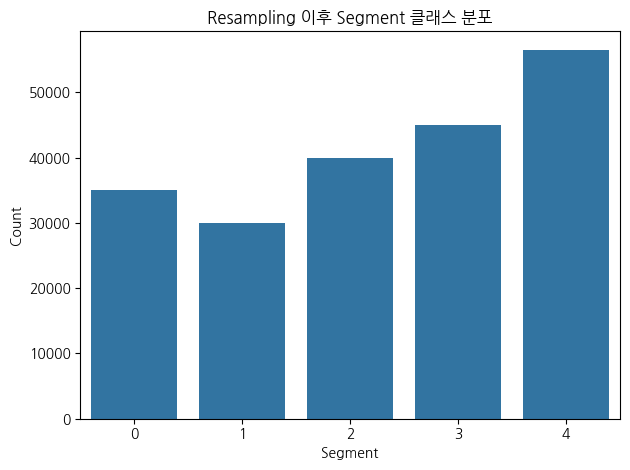

In [36]:
sns.countplot(x=y_resampled)
plt.title("Resampling 이후 Segment 클래스 분포")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [37]:
X.shape

(70560, 54)

In [38]:
y.shape

(70560,)

In [39]:
# 전처리 재실행
X_resampled = add_custom_features(X_resampled)
X_resampled = apply_frequency_encoding(X_resampled)

X_resampled.replace([np.inf, -np.inf], np.nan, inplace=True)
X_resampled.fillna(0, inplace=True)

assert not X_resampled.isin([np.inf, -np.inf]).any().any(), "inf 포함됨"
assert not X_resampled.isnull().any().any(), "nan 포함됨"

In [40]:
missing_columns = X.columns[X.isnull().any()].tolist()
print("결측치가 있는 컬럼 수:", len(missing_columns))
print("결측치 포함 컬럼 목록:")
print(missing_columns)


결측치가 있는 컬럼 수: 0
결측치 포함 컬럼 목록:
[]


### 하이퍼 파라미터 튜닝 및 앙상블

In [41]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import make_scorer, f1_score, classification_report
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# import numpy as np

# # 1. 데이터 분할
# X_train, X_val, y_train, y_val = train_test_split(
#     X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
# )

# # 2. F1 scorer 정의
# f1_macro = make_scorer(f1_score, average='macro')

# # 3. XGBoost 튜닝
# param_xgb = {
#     'n_estimators': [100, 300],
#     'max_depth': [3, 5],
#     'learning_rate': [0.05, 0.1]
# }
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# grid_xgb = GridSearchCV(xgb, param_xgb, scoring=f1_macro, cv=3, n_jobs=-1)
# grid_xgb.fit(X_train, y_train)
# best_xgb = grid_xgb.best_estimator_

# # 4. LightGBM 튜닝
# param_lgb = {
#     'n_estimators': [100, 300],
#     'max_depth': [3, 5],
#     'learning_rate': [0.05, 0.1]
# }
# lgb = LGBMClassifier(random_state=42)
# grid_lgb = GridSearchCV(lgb, param_lgb, scoring=f1_macro, cv=3, n_jobs=-1)
# grid_lgb.fit(X_train, y_train)
# best_lgb = grid_lgb.best_estimator_

# # 5. CatBoost 기본 (튜닝은 선택)
# cat = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
# cat.fit(X_train, y_train)

# # 6. soft voting 예측
# xgb_proba = best_xgb.predict_proba(X_val)
# lgb_proba = best_lgb.predict_proba(X_val)
# cat_proba = cat.predict_proba(X_val)

# ensemble_proba = (xgb_proba + lgb_proba + cat_proba) / 3
# ensemble_pred = np.argmax(ensemble_proba, axis=1)  # 가장 큰 값 반환

# # 7. 평가
# print("F1 Score (macro):", f1_score(y_val, ensemble_pred, average='macro'))
# print("F1 Score (weighted):", f1_score(y_val, ensemble_pred, average='weighted'))
# print("\n Classification Report:")
# print(classification_report(y_val, ensemble_pred))


### 최적의 파라미터 적용한 코드!!!!!!!!!!!!!!!


In [42]:
# 기존 전체 feature로 soft voting 평가 (기준 성능 유지용)
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np

# 1. 데이터 분할 (전체 feature 기준)
X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# 2. 모델 정의 및 학습
xgb = XGBClassifier(n_estimators=300, max_depth=5, use_label_encoder=False,
                    eval_metric='mlogloss', learning_rate=0.1, random_state=42)
lgb = LGBMClassifier(n_estimators=300, max_depth=5, learning_rate=0.1, random_state=42)
cat = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)

xgb.fit(X_train_all, y_train_all)
lgb.fit(X_train_all, y_train_all)
cat.fit(X_train_all, y_train_all)

# 3. soft voting 예측 (가중치 적용)
xgb_proba_all = xgb.predict_proba(X_val_all)
lgb_proba_all = lgb.predict_proba(X_val_all)
cat_proba_all = cat.predict_proba(X_val_all)

ensemble_proba_all = (
    0.5 * lgb_proba_all +
    0.3 * xgb_proba_all +
    0.2 * cat_proba_all
)
ensemble_pred_all = np.argmax(ensemble_proba_all, axis=1)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:54:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9226
[LightGBM] [Info] Number of data points in the train set: 165204, number of used features: 62
[LightGBM] [Info] Start training from score -1.774977
[LightGBM] [Info] Start training from score -1.929127
[LightGBM] [Info] Start training from score -1.641445
[LightGBM] [Info] Start training from score -1.523662
[LightGBM] [Info] Start training from score -1.295995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [43]:
# 4. ALL Features 평가
print("[Soft Voting - All Features] F1 Score (macro):", f1_score(y_val_all, ensemble_pred_all, average='macro'))
print("[Soft Voting - All Features] F1 Score (weighted):", f1_score(y_val_all, ensemble_pred_all, average='weighted'))
print("\n[Soft Voting - All Features] Classification Report:")
print(classification_report(y_val_all, ensemble_pred_all))


[Soft Voting - All Features] F1 Score (macro): 0.9381127982022143
[Soft Voting - All Features] F1 Score (weighted): 0.9321582543479414

[Soft Voting - All Features] Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7000
           1       1.00      1.00      1.00      6000
           2       0.90      0.89      0.89      8000
           3       0.86      0.84      0.85      9000
           4       0.93      0.96      0.95     11301

    accuracy                           0.93     41301
   macro avg       0.94      0.94      0.94     41301
weighted avg       0.93      0.93      0.93     41301



## 결과 제출

In [44]:
# 1. 테스트셋 불러오기
x_new = pd.read_csv("/content/drive/MyDrive/card_test.csv")

# 2. 전처리 및 파생 변수 적용
x_new = preprocessing(x_new)                       # Label Encoding
x_new = x_new[recommended_columns]                 # 컬럼 필터링
x_new = add_custom_features(x_new)                # 파생 변수 8개
x_new = apply_frequency_encoding(x_new)            # 연령 및 업종 freq 인코딩

# 3. 예측 함수 (Soft Voting)
def predict_test(X_test):
    xgb_p = xgb.predict_proba(X_test)
    lgb_p = lgb.predict_proba(X_test)
    cat_p = cat.predict_proba(X_test)
    final_p = (0.5 * lgb_p + 0.3 * xgb_p + 0.2 * cat_p)
    return np.argmax(final_p, axis=1)

# 4. 예측 수행
preds = predict_test(x_new)


In [45]:
submission = pd.read_csv("/content/drive/MyDrive/card_test_submission.csv")
submission

,Unnamed: 0,ID
0,0,TRAIN_291453
1,1,TRAIN_104115
2,2,TRAIN_129210
3,3,TRAIN_194246
4,4,TRAIN_183742
...,...,...
1435,1435,TRAIN_141071
1436,1436,TRAIN_202449
1437,1437,TRAIN_304936
1438,1438,TRAIN_208688


In [46]:
# 제출 포맷 저장
submission['Segment'] = pd.Series(predict_test(x_new)).replace({0:'A', 1:'B', 2:'C', 3:'D', 4:'E'})
submission

,Unnamed: 0,ID,Segment
0,0,TRAIN_291453,D
1,1,TRAIN_104115,C
2,2,TRAIN_129210,D
3,3,TRAIN_194246,D
4,4,TRAIN_183742,D
...,...,...,...
1435,1435,TRAIN_141071,D
1436,1436,TRAIN_202449,D
1437,1437,TRAIN_304936,D
1438,1438,TRAIN_208688,D


In [47]:
submission.to_csv("/content/drive/MyDrive/card_test_submission_final.csv", index=False)

In [48]:
print("최종 제출 파일 생성 완료: card_test_submission_result_final.csv")

최종 제출 파일 생성 완료: card_test_submission_result_final.csv


## K-Fold 기반 교차검증

In [49]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [50]:
f1_macro = make_scorer(f1_score, average='macro')

In [51]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [52]:
model_xgb = xgb
model_lgb = lgb
model_cat = cat

In [53]:
# 평가 지표
f1_macro = make_scorer(f1_score, average='macro')

# 검증 방식
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 모델 정의
model_xgb = XGBClassifier(n_estimators=300, max_depth=5, use_label_encoder=False,
                          eval_metric='mlogloss', learning_rate=0.1, random_state=42)
model_lgb = LGBMClassifier(n_estimators=300, max_depth=5, learning_rate=0.1, random_state=42)
model_cat = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)

scores_xgb = cross_val_score(
    model_xgb,
    X_resampled, y_resampled,
    scoring=f1_macro,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

scores_lgb = cross_val_score(
    model_lgb,
    X_resampled, y_resampled,
    scoring=f1_macro,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

scores_cat = cross_val_score(
    model_cat,
    X_resampled, y_resampled,
    scoring=f1_macro,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

print("------------XGB----------------")
print("Fold별 F1 (macro):", scores_xgb)
print("평균 F1 (macro):", np.mean(scores_xgb))
print("------------LGB----------------")
print("Fold별 F1 (macro):", scores_lgb)
print("평균 F1 (macro):", np.mean(scores_lgb))
print("------------CAT----------------")
print("Fold별 F1 (macro):", scores_cat)
print("평균 F1 (macro):", np.mean(scores_cat))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


------------XGB----------------
Fold별 F1 (macro): [0.93213463 0.93340242 0.93100602]
평균 F1 (macro): 0.9321810225442023
------------LGB----------------
Fold별 F1 (macro): [0.94113005 0.94227449 0.94038989]
평균 F1 (macro): 0.9412648095191479
------------CAT----------------
Fold별 F1 (macro): [0.91820384 0.92101279 0.91669023]
평균 F1 (macro): 0.9186356200531686


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished


### 예측 결과와 실제 정답 클래스 분포 비교

In [58]:
def predict_test_debug(X_test):
    xgb_p = xgb.predict_proba(X_test)
    lgb_p = lgb.predict_proba(X_test)
    cat_p = cat.predict_proba(X_test)
    final_p = (0.5 * lgb_p + 0.3 * xgb_p + 0.2 * cat_p)

    # 클래스별 확률 평균 보기
    avg_probs = pd.DataFrame(final_p).mean()
    print("클래스별 평균 확률:", avg_probs)

    return np.argmax(final_p, axis=1)


In [59]:
predict_test_debug(x_new)

클래스별 평균 확률: 0    0.000008
1    0.000006
2    0.131727
3    0.777005
4    0.091254
dtype: float64


array([3, 2, 3, ..., 3, 3, 3])